Data collectino and processing


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
from inspect import GEN_CLOSED
#loading csv data to a pandas dataframe
data=pd.read_csv(r'C:\Users\sumit\OneDrive\Desktop\machine learning\projects\gold price prediction\gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# checking number of missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# getting statistial analyss of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
data1=data.drop(['Date'],axis=1)
correlation= data1.corr()

<Axes: >

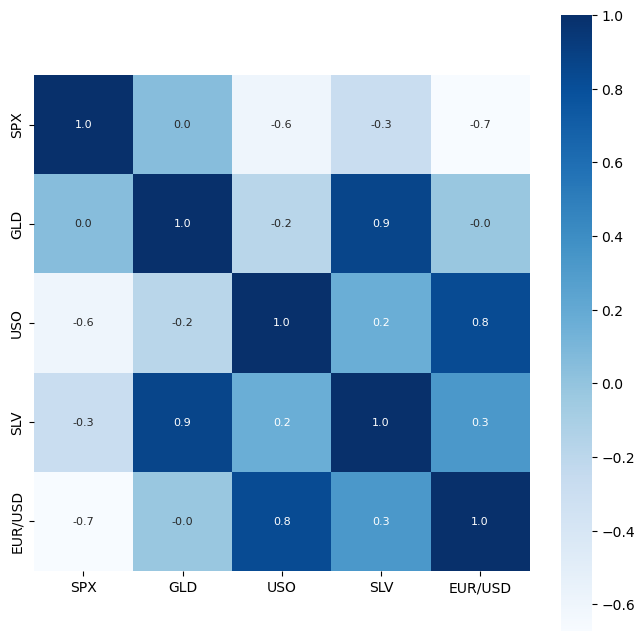

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

C:\Users\sumit\AppData\Local\Temp\ipykernel_5628\2278696031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='yellow')


<Axes: xlabel='GLD', ylabel='Density'>

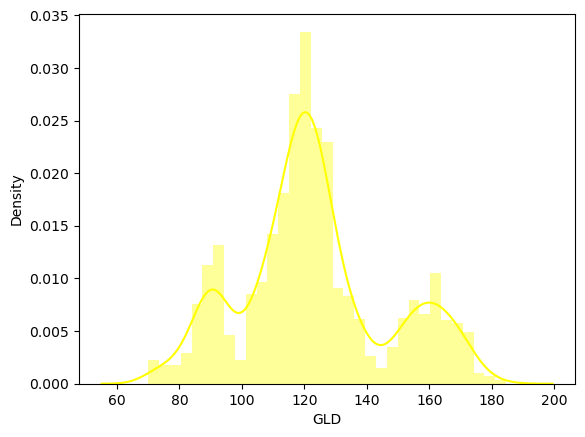

In [10]:
sns.distplot(data['GLD'],color='yellow')

In [11]:
X=data.drop(['GLD','Date'],axis=1)
Y=data['GLD']


splitting the data for the training and testeing purpose

In [12]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=2,test_size=0.2)

Model training Random orestt detection

In [32]:
regressor=RandomForestRegressor(n_estimators=100)
model=RandomForestRegressor(n_estimators=100)

Training the model

In [33]:
regressor.fit(X_train,Y_train)
model.fit(X_train,Y_train)

RandomForestRegressor()

In [37]:
# Python code
import tensorflow as tf

# Assume your model is trained already
model.save("my_model")

# OR save directly as .h5
model.save("my_model.h5")
# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model("my_model")
tflite_model = converter.convert()

# Save it
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


ModuleNotFoundError: No module named 'tensorflow'

Model evaluation

In [24]:
test_data_predection= regressor.predict(X_test)

In [25]:
# print(X_test)
# print(test_data_predection)
sample = np.array([[1351.94, 38.32, 32.9, 1.32]])
result = regressor.predict(sample)
print(result)
# print(result)

[168.5494988]


c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [26]:
error_score=metrics.r2_score(Y_test,test_data_predection)
print("R square error:",error_score)

R square error: 0.9897625644895574


compare the actual value and predicted values in plt

In [27]:
Y_test=list(Y_test)

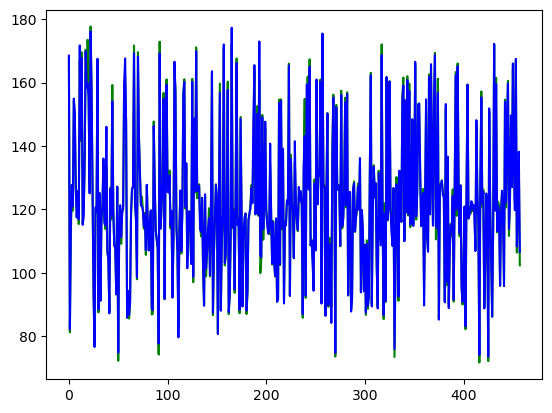

In [28]:
plt.plot(Y_test,color='green',label="actual values")
plt.plot(test_data_predection,color="blue",label="predicated values")

In [29]:
# import pickle
# pickle.dump(regressor,open('model1.pkl','wb'))


In [30]:
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model("regressor")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


ModuleNotFoundError: No module named 'tensorflow'